#Import Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/UberDataset.csv")

In [36]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Trip time,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,January


In [4]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#Data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
df['CATEGORY'].value_counts()

,count
CATEGORY,
Business,1078
Personal,77


In [8]:
df['PURPOSE'].value_counts()

,count
PURPOSE,
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Temporary Site,50
Between Offices,18
Moving,4
Airport/Travel,3
Commute,1


In [9]:
df['START'].value_counts()

,count
START,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Krendle Woods,1
Fuquay-Varina,1
Wake Co.,1


In [10]:
df['STOP'].value_counts().head(50)

,count
STOP,
Cary,203
Unknown Location,149
Morrisville,84
Whitebridge,65
Islamabad,58
Durham,36
Lahore,36
Raleigh,29
Kar?chi,26


#Data cleaning

In [11]:
df.drop(index=[1155],inplace=True)

In [12]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [13]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [14]:
x = df['END_DATE']-df['START_DATE']

In [15]:
df['Trip time']=x /pd.Timedelta(minutes=1)

In [16]:
df['Month']=df['START_DATE'].dt.month_name()

In [17]:
df['Trip time'].describe().round(2)

,Trip time
count,1155.00
mean,23.24
std,27.32
min,0.00
25%,10.00
50%,16.00
75%,27.50
max,336.00


#Total Trips

In [18]:
df['START'].count()

np.int64(1155)

#Average Trip Time(min)

In [21]:
df['Trip time'].mean().round(2)

np.float64(23.24)

#cities

In [29]:
df['START'].nunique()

177

#Frequency of Trip time

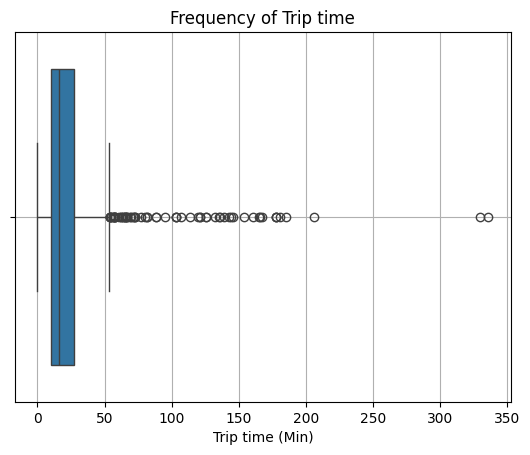

In [30]:
sns.boxplot(data = df,x = "Trip time")
plt.title("Frequency of Trip time")
plt.xlabel("Trip time (Min)")
plt.xticks(rotation=0)
plt.grid(linestyle='-')
plt.show()

#Frequency of Miles

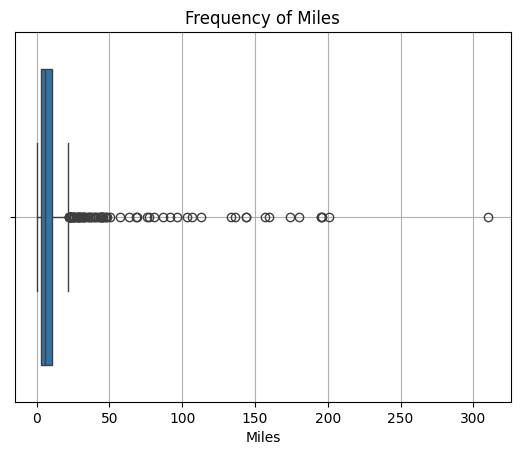

In [31]:
sns.boxplot(data = df,x = "MILES")
plt.title("Frequency of Miles")
plt.xlabel("Miles")
plt.xticks(rotation=0)
plt.grid(linestyle='-')
plt.show()

#What is the most commonly Purpose?

###Meeting

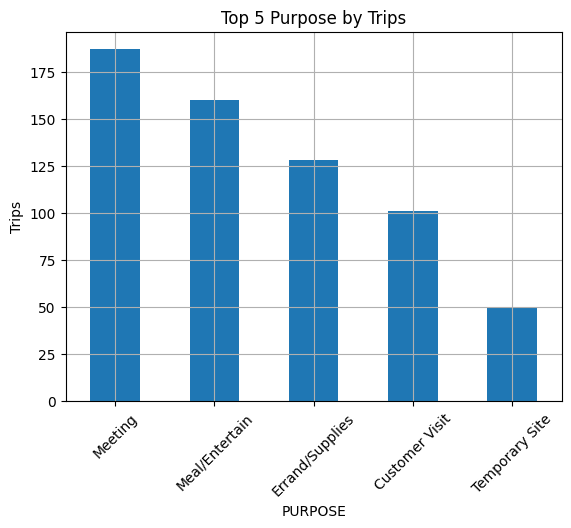

In [34]:
df['PURPOSE'].value_counts().head().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Trips")
plt.title("Top 5 Purpose by Trips")
plt.grid(linestyle='-')
plt.show()

#What are the most common Category ?

###Business

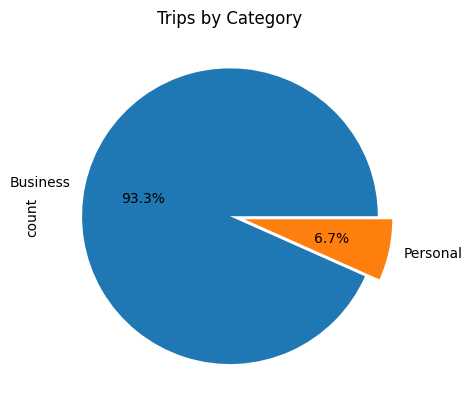

In [35]:
df['CATEGORY'].value_counts().head().plot(kind='pie',autopct='%1.1f%%',explode=(0,0.1))
plt.title("Trips by Category")
plt.show()

Text(0.5, 1.0, 'Purpose by Category')

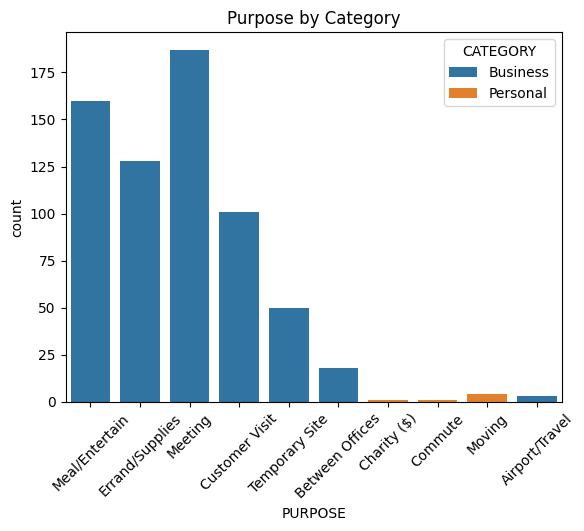

In [38]:
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=45)
plt.title("Purpose by Category")
